<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/A%C3%A7%C3%B5es_Analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [1]:
# https://github.com/numpy/numpy
import numpy as np

# https://github.com/pandas-dev/pandas
import pandas as pd

# https://github.com/pydata/pandas-datareader
import pandas_datareader as web

# https://github.com/matplotlib/matplotlib
import matplotlib.pyplot as plt

# https://github.com/mwaskom/seaborn 
import seaborn as sns
sns.set()

# https://github.com/jupyter-widgets/ipywidgets
import ipywidgets as widgets

# https://github.com/ranaroussi/yfinance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=5e6f9331daf92fbf4b246701be2deb8874083297a5e5c6394b82719f8ccdeb36
  Stored in directory: /tmp/pip-ephem-wheel-cache-5vtnydz4/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


# 2. Obtendo e tratando os dados.

In [2]:
# Selecione o Ativo.
d = widgets.Dropdown(options=['^BVSP', 'ITUB3.SA', 'ITUB4.SA', 'ITSA3.SA', 'ITSA4.SA', 'VALE3.SA'], value=None)
d

Dropdown(options=('^BVSP', 'ITUB3.SA', 'ITUB4.SA', 'ITSA3.SA', 'ITSA4.SA', 'VALE3.SA'), value=None)

In [3]:
# %d Defina a seleção.
d = d.value
d

'ITSA3.SA'

In [0]:
# %ativo Carregue o Ativo selecionado.
ativo = web.get_data_yahoo(d)

In [5]:
# Conheça os dados mais antigos para o Ativo.
ativo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-15,7.88780,7.67660,7.67660,7.88780,19942.0,5.744842
2015-05-18,7.86343,7.65223,7.77408,7.70909,10217.0,5.614683
2015-05-19,7.84719,7.55475,7.66035,7.84719,27451.0,5.715263
2015-05-20,7.67660,7.51413,7.67660,7.51413,77184.0,5.472691
2015-05-21,7.55475,7.42477,7.53850,7.55475,45178.0,5.502274


In [6]:
# Conheça os dados mais recentes para o Ativo.
ativo.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-06,10.49,10.21,10.40,10.24,145600.0,10.24
2020-05-07,10.39,9.88,10.37,9.97,318100.0,9.97
2020-05-08,10.28,9.94,9.94,10.19,165000.0,10.19
2020-05-11,10.40,10.04,10.19,10.06,245700.0,10.06
2020-05-12,0.00,0.00,0.00,9.67,0.0,9.67


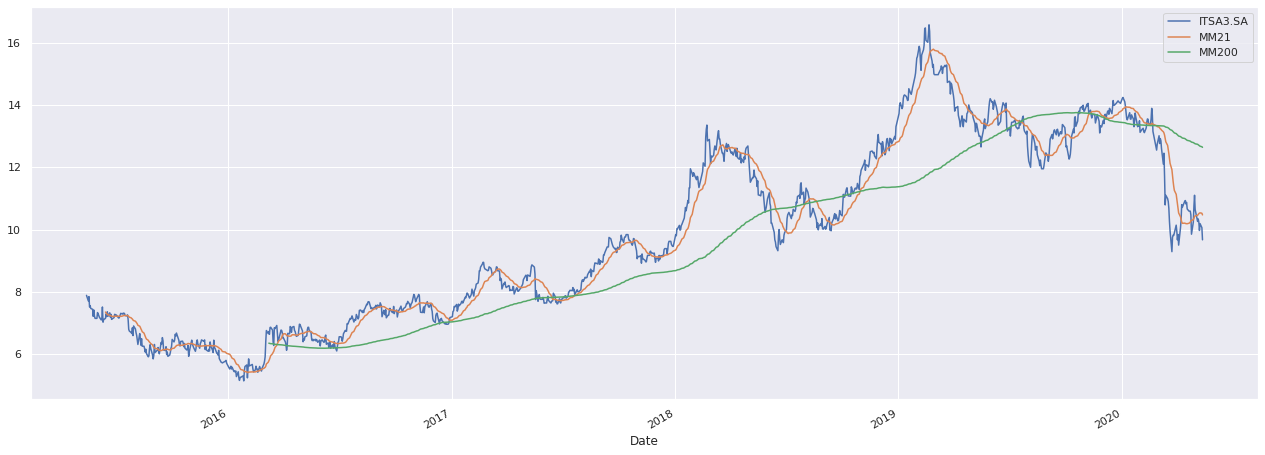

In [7]:
# Desenhe um gráfico com médias móveis para as referencias de fechamento de todo o período do dado do Ativo.
ativo["Close"].plot(figsize=(22,8), label=d)
ativo["Close"].rolling(21).mean().plot(label="MM21")
ativo["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

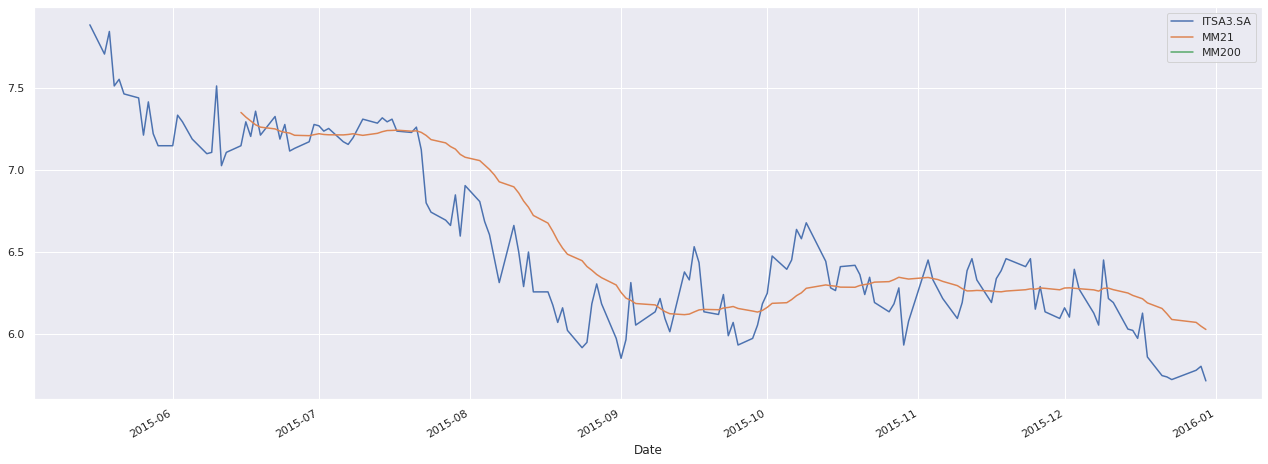

In [8]:
# %ativo_ano Desenhe um gráfico com médias móveis para as referências de fechamento do período de um ano do Ativo.
ativo_ano = ativo[ativo.index.year == 2015]
ativo_ano["Close"].plot(figsize=(22,8), label=d)
ativo_ano["Close"].rolling(21).mean().plot(label="MM21")
ativo_ano["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

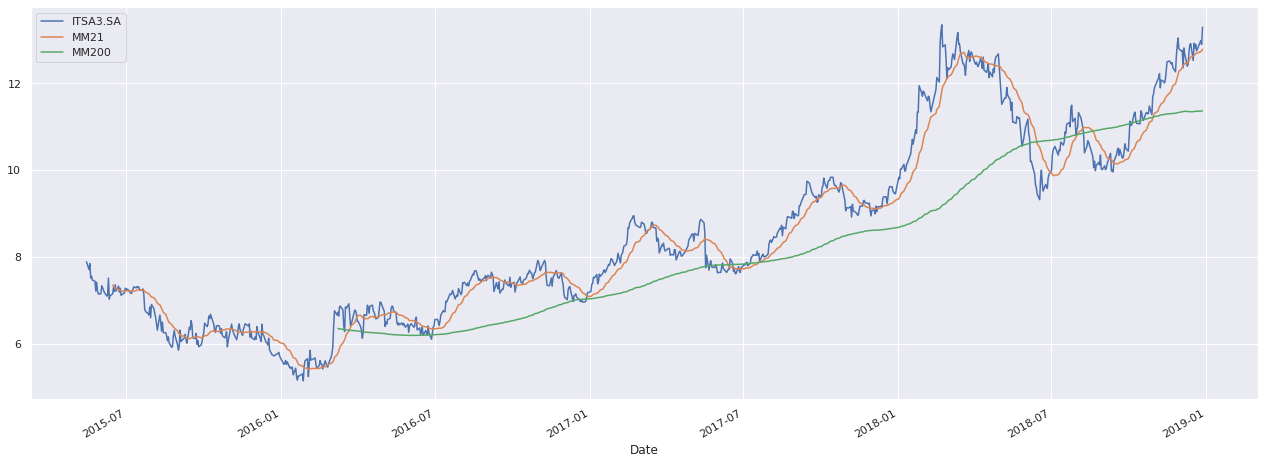

In [9]:
# %ativo_ano2 Desenhe um gráfico com médias móveis para as referências de um período entre anos do Ativo.
ativo_ano2 = ativo[(ativo.index.year >= 2015) & (ativo.index.year <= 2018)]
ativo_ano2["Close"].plot(figsize=(22,8), label=d)
ativo_ano2["Close"].rolling(21).mean().plot(label="MM21")
ativo_ano2["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [10]:
# %ativo_dia Relacione os dados para um dia específico para 50(máximo) repetições do Ativo.
ativo_dia = ativo[ativo.index.day == 14]
ativo_dia.tail(50)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-14,7.327290,7.23793,7.270430,7.319170,445627.0,5.341905
2015-08-14,6.311870,6.23876,6.238760,6.255000,4062.0,4.628901
2015-09-14,6.376850,6.14940,6.173770,6.376850,39638.0,4.730959
2015-10-14,6.474340,6.27937,6.458090,6.279370,16372.0,4.658640
2015-12-14,6.133150,6.02755,6.108780,6.027550,24866.0,4.568486
2016-01-14,5.458910,5.28020,5.402050,5.458910,28436.0,4.137494
2016-03-14,7.002360,6.66117,6.937370,6.774900,308861.0,5.323720
2016-04-14,7.042970,6.66117,7.042970,6.701790,145259.0,5.266271
2016-06-14,6.397980,6.18352,6.362230,6.219260,42861.0,4.898830


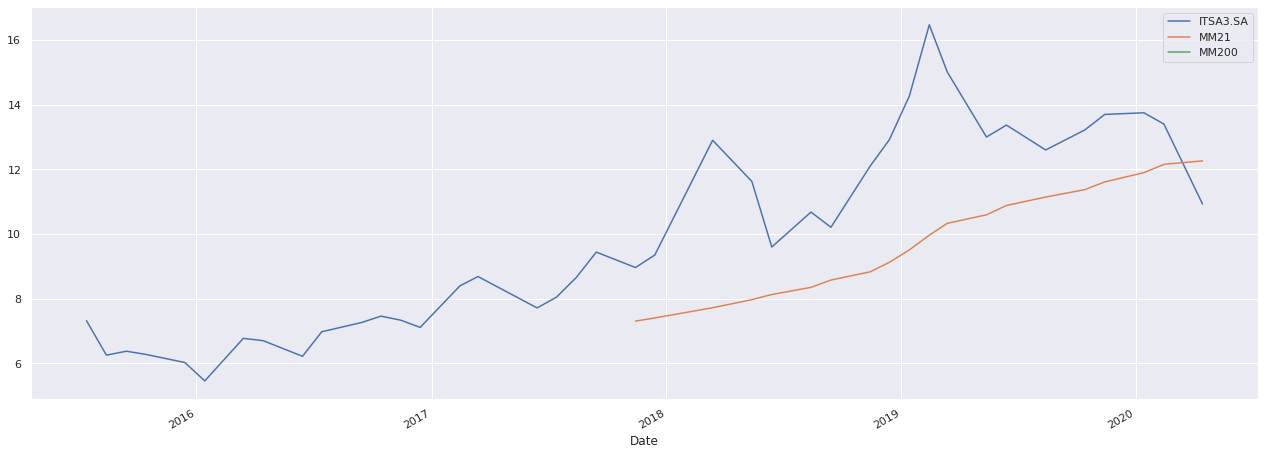

In [11]:
# Desenhe um gráfico com médias móveis para o relacionamento anterior.
ativo_dia["Close"].plot(figsize=(22,8), label=d)
ativo_dia["Close"].rolling(21).mean().plot(label="MM21")
ativo_dia["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [12]:
# %ativo_mes elacione os dados para um mês específico para 100(máximo) repetições do Ativo.
ativo_mes = ativo[ativo.index.month == 12]
ativo_mes.tail(100)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-01,6.15752,6.02755,6.03567,6.15752,20927.0,4.579515
2015-12-02,6.23876,6.00318,6.17377,6.10066,23635.0,4.537227
2015-12-03,6.56369,6.24688,6.27125,6.39310,49732.0,4.754723
2015-12-04,6.29562,6.14940,6.19002,6.27125,23019.0,4.664097
2015-12-07,6.31999,6.12503,6.27937,6.12503,28436.0,4.555351
...,...,...,...,...,...,...
2019-12-20,14.05000,13.77000,14.00000,13.99000,145800.0,13.737280
2019-12-23,14.05000,13.93000,13.99000,14.05000,124200.0,13.796196
2019-12-26,14.14000,13.97000,14.05000,14.13000,649700.0,13.874750


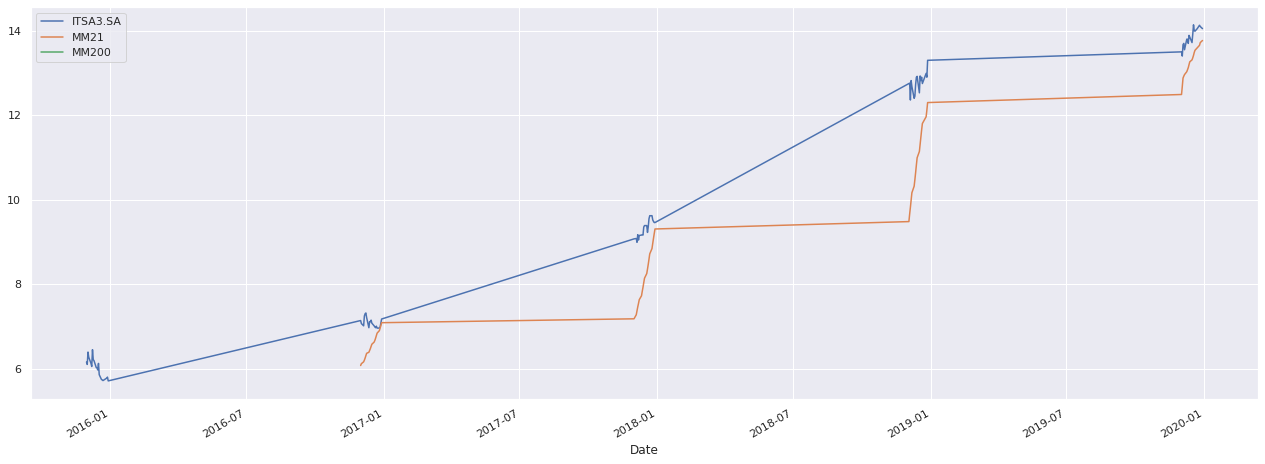

In [13]:
# Desenhe um gráfico com médias móveis para o relacionamento anterior.
ativo_mes["Close"].plot(figsize=(22,8), label=d)
ativo_mes["Close"].rolling(21).mean().plot(label="MM21")
ativo_mes["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

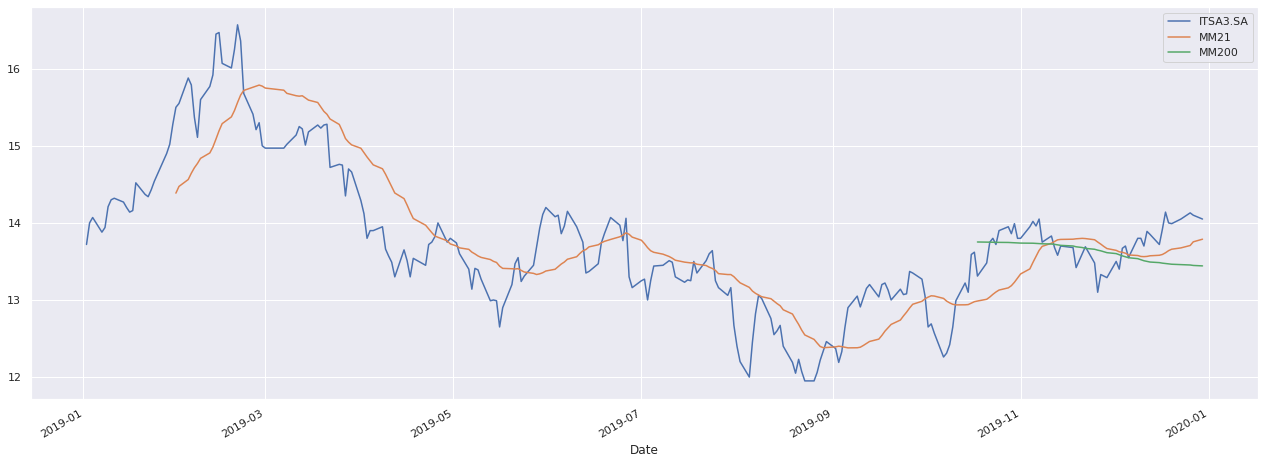

In [14]:
# %ativo2 Carregue o Ativo para um intervalo definido de data.
ativo2 = web.get_data_yahoo(d, start='2019-01-01', end='2020-01-01')
ativo2["Close"].plot(figsize=(22,8), label=d)
ativo2["Close"].rolling(21).mean().plot(label="MM21")
ativo2["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [15]:
# %portfolio Estabelecendo relações entre Ativos.
tickers = ["^BVSP", "USDBRL=X"]
portfolio = web.get_data_yahoo(tickers)["Close"]
portfolio

Symbols,^BVSP,USDBRL=X
Date,,
2015-05-14,NaN,2.98990
2015-05-15,57249.000000,NaN
2015-05-17,NaN,2.99140
2015-05-18,56204.000000,3.00580
2015-05-19,55499.000000,3.03160
...,...,...
2020-05-07,78119.000000,5.82872
2020-05-08,80263.000000,NaN
2020-05-10,NaN,5.47700


In [0]:
# Limpar a tabela dropando os dados faltantes (NaN).
portfolio = portfolio.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdae1c3908>,
      dtype=object)

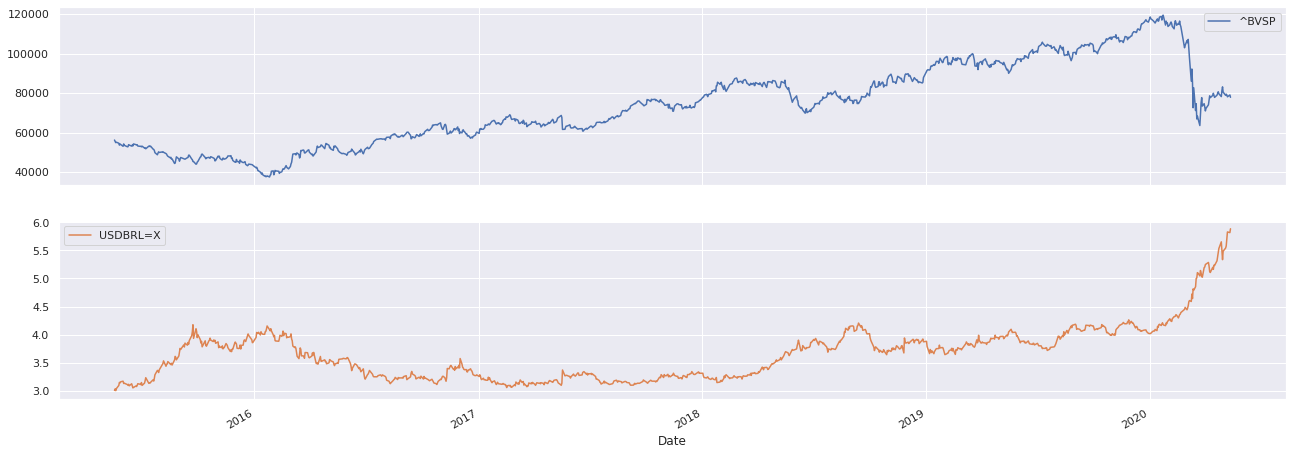

In [17]:
# Desenhe o gráfico da correlação anterior
portfolio.plot(subplots=True, figsize=(22,8))

In [18]:
# Estabelecer uma correlação entre Ativos.
portfolio.corr()

Symbols,^BVSP,USDBRL=X
Symbols,,
^BVSP,1.000000,0.360069
USDBRL=X,0.360069,1.000000


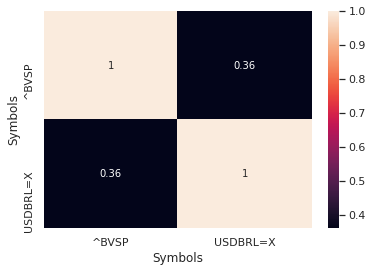

In [19]:
# Calcular a correlação entre os Ativo.
sns.heatmap(portfolio.corr(), annot=True)

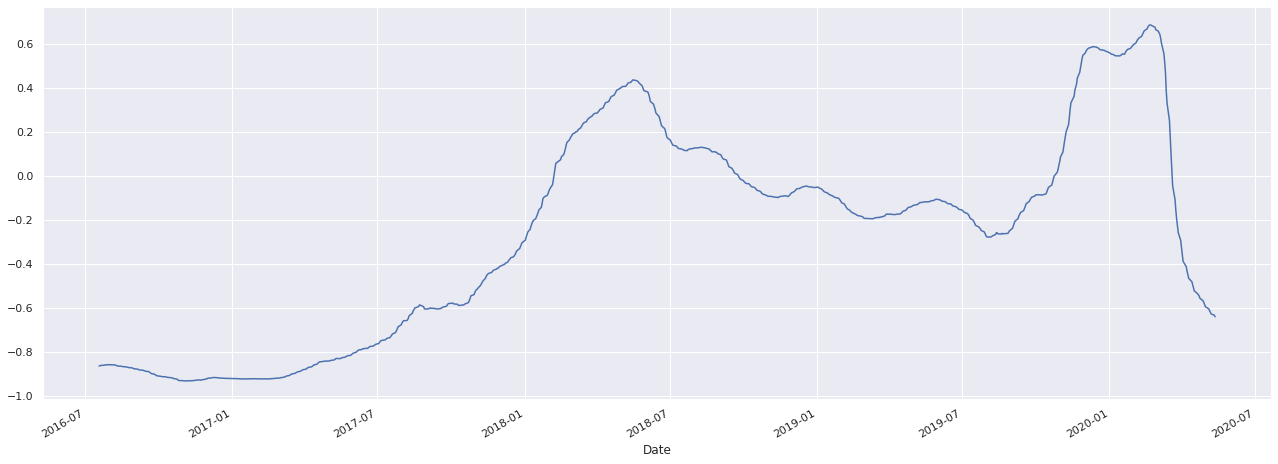

In [20]:
# Desenhe um gráfico de correlação para o período de 252(Um ano em dias úteis) para os Ativos selecionados.
portfolio["USDBRL=X"].rolling(252).corr(portfolio["^BVSP"]).plot(figsize=(22,8))

In [21]:
# Dolarizando ^BVSP
portfolio["^BVSP_in_Dolar"] = (portfolio["^BVSP"] / portfolio["USDBRL=X"])
portfolio

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Symbols,^BVSP,USDBRL=X,^BVSP_in_Dolar
Date,,,
2015-05-18,56204.000000,3.00580,18698.516147
2015-05-19,55499.000000,3.03160,18306.834684
2015-05-20,54901.000000,3.00170,18289.969478
2015-05-21,55112.000000,3.03670,18148.648142
2015-05-25,54609.000000,3.09320,17654.532704
...,...,...,...
2020-05-05,79471.000000,5.57810,14246.965291
2020-05-06,79064.000000,5.71520,13833.986690
2020-05-07,78119.000000,5.82872,13402.427764


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdae06a908>,
      dtype=object)

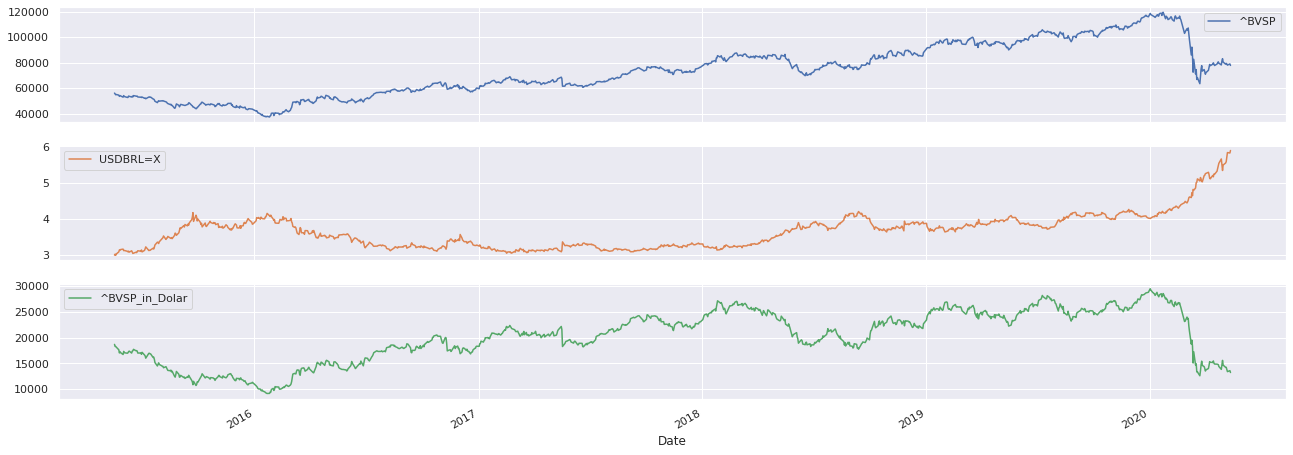

In [22]:
# Desenhe o gráfico da correlação anterior
portfolio.plot(subplots=True, figsize=(22,8))

In [23]:
# %portfolio2 %ibov Relacionando Ativos e o índice ^BVSP
portfolio2 = yf.download("ITUB3.SA, ITUB4.SA, ITSA3.SA, ITSA4.SA", period="5y")["Adj Close"]
ibov = yf.download("^BVSP", period="5y")["Adj Close"]
portfolio2, ibov

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


(             ITSA3.SA  ITSA4.SA   ITUB3.SA   ITUB4.SA
 Date                                                 
 2015-05-12   5.679765  5.745818  15.013877  16.781778
 2015-05-13   5.620596  5.638643  14.996689  16.666710
 2015-05-14   5.632432  5.686276  15.061206  16.830490
 2015-05-15   5.744842  5.745818  15.340974  17.144880
 2015-05-18   5.614683  5.674369  15.108614  16.688807
 ...               ...       ...        ...        ...
 2020-05-06  10.240000  8.700000  21.500000  22.240000
 2020-05-07   9.970000  8.290000  20.799999  21.440001
 2020-05-08  10.190000  8.490000  21.340000  22.320000
 2020-05-11  10.060000  8.490000  21.709999  22.469999
 2020-05-12   9.670000  8.180000  20.900000  21.610001
 
 [1242 rows x 4 columns], Date
 2015-05-12    56792.000000
 2015-05-13    56372.000000
 2015-05-14    56657.000000
 2015-05-15    57249.000000
 2015-05-18    56204.000000
                   ...     
 2020-05-06    79064.000000
 2020-05-07    78119.000000
 2020-05-08    80263.000000


In [24]:
# Estabelecer uma correlação entre Ativos.
portfolio2.corr()

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
ITSA3.SA,1.000000,0.981975,0.968018,0.959493
ITSA4.SA,0.981975,1.000000,0.985574,0.981992
ITUB3.SA,0.968018,0.985574,1.000000,0.995821
ITUB4.SA,0.959493,0.981992,0.995821,1.000000


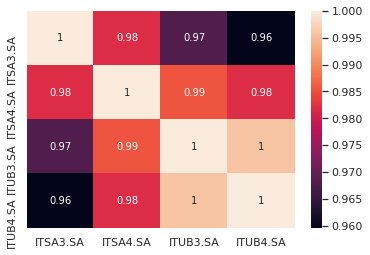

In [25]:
# Calcular a correlação entre os Ativo.
sns.heatmap(portfolio2.corr(), annot=True)

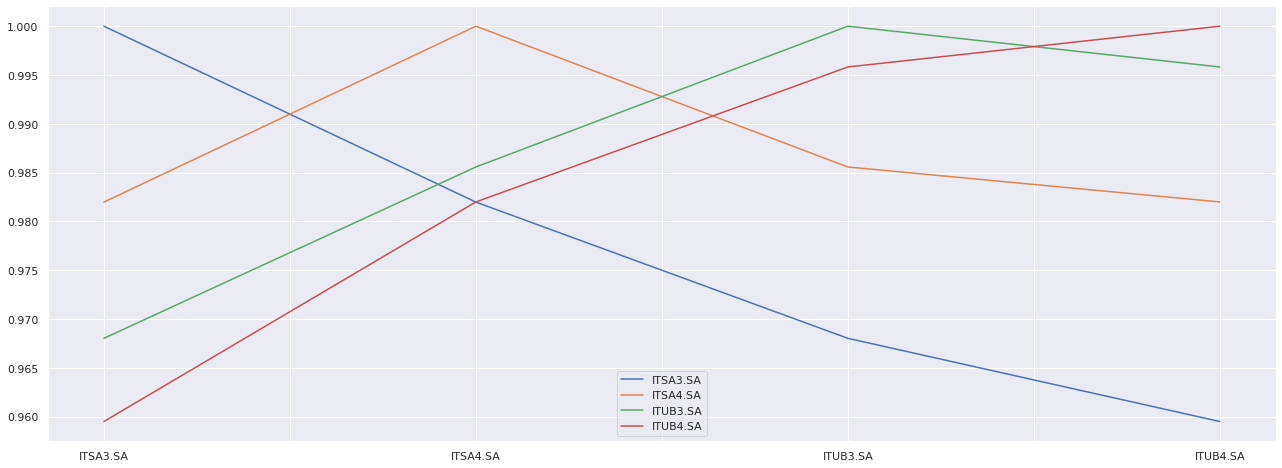

In [26]:
# Desenhe um gráfico de correlação dos Ativos relacionados.
portfolio2.corr().plot(figsize=(22,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcda82c8ef0>,
      dtype=object)

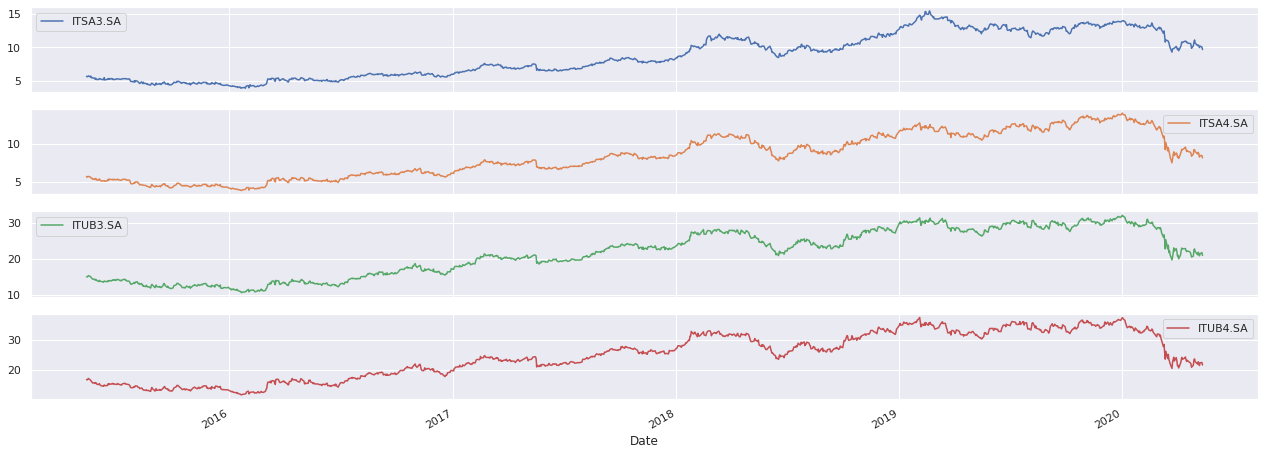

In [27]:
# Desenhe o gráfico da correlação anterior
portfolio2.plot(subplots=True, figsize=(22,8))

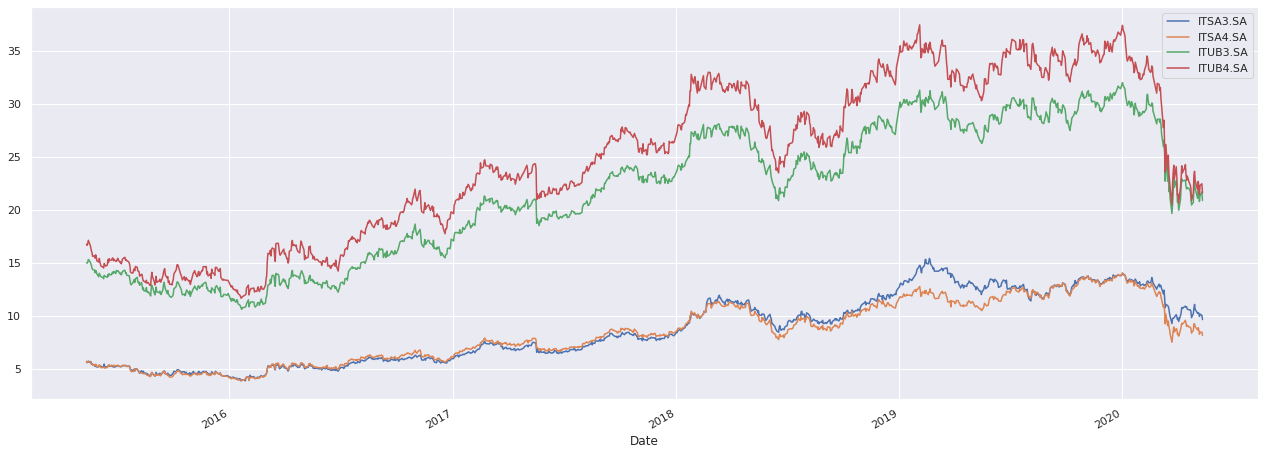

In [28]:
# Desenhando a relação de Ativos.
portfolio2.plot(figsize=(22,8))

In [29]:
# %portfolio_ajusted Normalizar a correlação de Ativos simulando uma compra de 10 Mil reais em cada Ativo.
portfolio2_ajusted = (portfolio2 / portfolio2.iloc[0])*10000
portfolio2_ajusted

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
Date,,,,
2015-05-12,10000.000000,10000.000000,10000.000000,10000.000000
2015-05-13,9895.826075,9813.473243,9988.551876,9931.432514
2015-05-14,9916.664218,9896.374669,10031.523469,10029.026588
2015-05-15,10114.576626,10000.000000,10217.863075,10216.366795
2015-05-18,9885.414979,9875.651595,10063.099660,9944.599553
...,...,...,...,...
2020-05-06,18028.915327,15141.447784,14320.085426,13252.469033
2020-05-07,17553.544398,14427.885552,13853.849579,12775.761964
2020-05-08,17940.883176,14775.964487,14213.517450,13300.139740


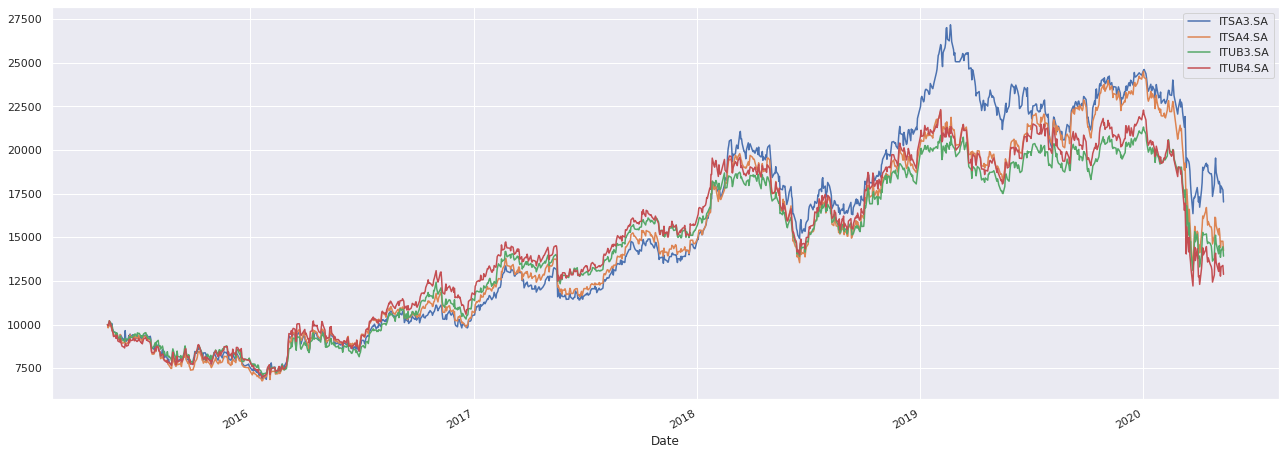

In [30]:
# Desenhe a relação simulada anterior
portfolio2_ajusted.plot(figsize=(22,8))

In [31]:
# Criar uma coluna de Saldo para o efeito de relacionar a perfomance do portfolio.
portfolio2_ajusted["RESULTS"] = portfolio2_ajusted.sum(axis=1)
portfolio2_ajusted                                                    

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,RESULTS
Date,,,,,
2015-05-12,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000
2015-05-13,9895.826075,9813.473243,9988.551876,9931.432514,39629.283708
2015-05-14,9916.664218,9896.374669,10031.523469,10029.026588,39873.588945
2015-05-15,10114.576626,10000.000000,10217.863075,10216.366795,40548.806496
2015-05-18,9885.414979,9875.651595,10063.099660,9944.599553,39768.765787
...,...,...,...,...,...
2020-05-06,18028.915327,15141.447784,14320.085426,13252.469033,60742.917570
2020-05-07,17553.544398,14427.885552,13853.849579,12775.761964,58611.041492
2020-05-08,17940.883176,14775.964487,14213.517450,13300.139740,60230.504853


In [32]:
# %ibov_ajusted Normalizar o ^BVSP simulando uma compra de 40 Mil reais (Relação de Ativos anterior).
ibov_ajusted = (ibov / ibov.iloc[0])*40000
ibov_ajusted

Date
2015-05-12    40000.000000
2015-05-13    39704.183688
2015-05-14    39904.916185
2015-05-15    40321.876321
2015-05-18    39585.857163
                  ...     
2020-05-06    55686.716439
2020-05-07    55021.129737
2020-05-08    56531.201578
2020-05-11    55687.420763
2020-05-12    54847.128557
Name: Adj Close, Length: 1236, dtype: float64

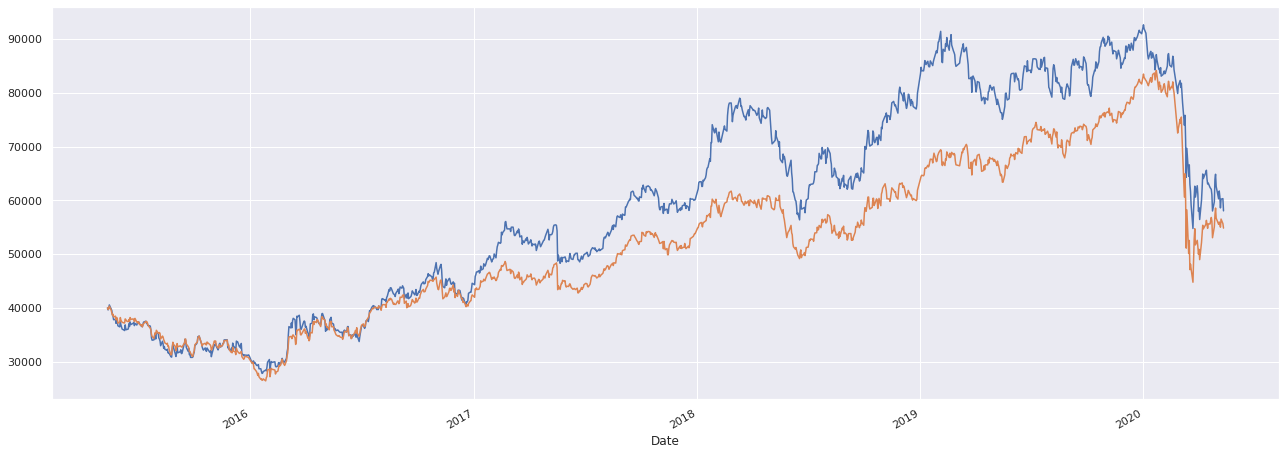

In [33]:
# Desenhe a relação de Ativos e o ^BVSP
portfolio2_ajusted["RESULTS"].plot(figsize=(22,8), label="Portfolio Ajusted")
ibov_ajusted.plot(label="ibov")


In [34]:
# Calcular o retorno diário dos Ativos relacionados.
porfolio2_returns = portfolio2.pct_change()
porfolio2_returns = porfolio2_returns.dropna()
porfolio2_returns

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
Date,,,,
2015-05-13,-0.010417,-0.018653,-0.001145,-0.006857
2015-05-14,0.002106,0.008448,0.004302,0.009827
2015-05-15,0.019958,0.010471,0.018575,0.018680
2015-05-18,-0.022657,-0.012435,-0.015146,-0.026601
2015-05-19,0.017914,-0.015740,-0.011677,-0.014062
...,...,...,...,...
2020-05-06,-0.009671,-0.023569,-0.013761,-0.020264
2020-05-07,-0.026367,-0.047126,-0.032558,-0.035971
2020-05-08,0.022066,0.024125,0.025962,0.041045


In [35]:
# Filtrando ativos requeridos + Results + Returns
portfolio3 = 10000 * portfolio2
portfolio3["RESULTS"] = portfolio3.sum(axis=1)
portfolio3["RETURNS"] = portfolio3["RESULTS"].pct_change()
portfolio3["RETURNS"] = portfolio3["RETURNS"].fillna(0)
portfolio3

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,RESULTS,RETURNS
Date,,,,,,
2015-05-12,56797.647476,57458.176613,150138.769150,167817.783356,432212.376595,0.000000
2015-05-13,56205.964088,56386.427879,149966.888428,166667.098999,429226.379395,-0.006909
2015-05-14,56324.319839,56862.764359,150612.058640,168304.901123,432104.043961,0.006704
2015-05-15,57448.415756,57458.176613,153409.738541,171448.802948,439765.133858,0.017730
2015-05-18,56146.831512,56743.693352,151086.139679,166888.065338,430864.729881,-0.020239
...,...,...,...,...,...,...
2020-05-06,102399.997711,86999.998093,215000.000000,222399.997711,626799.993515,-0.016784
2020-05-07,99700.002670,82899.999619,207999.992371,214400.005341,605000.000000,-0.034780
2020-05-08,101899.995804,84899.997711,213400.001526,223199.996948,623399.991989,0.030413
